# Task 2: Information Retrieval

## Document Indexing

Document indexing is the method of using specific attributes of a document to create an index. This index is used to be able to retrieve the information from the document. In this case we will be the TF.IDF value which will be stored using a term by document matrix.

A term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. This is a matrix where. Each row represents one document. Each column represents one term (word)

Importing all necessary libraries

In [1]:
#Libraries for Pre-Processing
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from bs4 import BeautifulSoup as bs

#Libraries for TF-IDF and Cosine Similarity
import math
import numpy as np
from collections import Counter 

### Pre-Processing

Pre-Processing is the process of preparing data so that it could be further analysed. This includes tokenization, case folding, stop-word removal and stemming. This makes the data much more manageable and so easier to analyse.

Reading from File

In [2]:
def read_file(fileName):

    content = []
    with open(fileName, 'r', encoding="utf8") as file:
        # Read each line in the file, readlines() returns a list of lines
        content = file.readlines()

        # Combine the lines in the list into a string
        content = "".join(content)
        bs_content = bs(content, "xml")

    #returns "bs4.element.Tag" object
    result = bs_content.find("raw")
    #print(result.prettify())

    return result

Changing from a bs4.element.Tag object to a String.

In [3]:
def convert_Text(data):

    text = data.get_text()

    return text

Tokenizing the Data

In [4]:
def tokenize(data):
    
    tokens = nltk.word_tokenize(data)

    return tokens

Changing all the words to lowercase

In [5]:
def change_case(data):

    for i in range(len(data)):
        data[i] = data[i].casefold()

    return data

Removing all 'extra' words, such as “the”, “is” and “and”. These do not give us any meaning and so can be ignored.

In [6]:
def remove_stop_words(data):
    
    stop_words = set(stopwords.words('english'))

    filtered_list = []

    for word in data: 
        if word not in stop_words:
            filtered_list.append(word)

    return filtered_list

Stemming reduces the word to its essence, rather than grammatical correctnes. For example "waiting" and "waits" would both be reduced to "wait".

In [7]:
def stemming(data):
    
    ps = PorterStemmer() 

    for i in range(len(data)):
        data[i] = ps.stem(data[i])

    return data

Removing Symbols

In [8]:
def remove_symbols(data):
    
    temp = []

    symbols = "“”‘’!\"#$€%&()*'+-,./:;<=>?@[\]^_`{|}~\n"
    for t in data:
        if t not in symbols:
            temp.append(t)
            
    return temp

In [9]:
def preprocessing(filename):
    data = read_file(filename)
    data = convert_Text(data)
    data = tokenize(data)
    data = change_case(data)
    data = remove_stop_words(data)
    data = stemming(data)
    data = remove_symbols(data)
    
    return data

### Printing and Data managment

Returns the query selected as text

In [10]:
def print_query(filename):
    data = read_file(filename)
    data = convert_Text(data)
    
    return data

Given the id of a document, meaning the index it is located in an array, returns the text found in that particular document.

In [11]:
def print_doc(id):
    text = read_file(file_dataset[id][0])
    print(text)

Given a dictionary, returns a matrix

In [49]:
def get_Matrix(dictionary):

    data = list(dictionary.items())
    matrix = np.array(data)
    
    return matrix

Prints out a matrix in an organised way

In [48]:
def print_Matrix(matrix):
    print('\n'.join([''.join(['{:15}'.format(item) for item in row]) 
      for row in matrix]))

### Calculating for TF-IDF

Term Frequency-Inverse Document Frequency, or in short, TF-IDF is a technique to quantify a word in documents, we compute a weight to each word which signifies the importance of the word in the document and the dataset. This weight is then stored in a term by document matrix. The image below goes over the basic formulas of how the TF-IDF is worked out.

![TFID Formula Explenation](https://miro.medium.com/max/538/1*dug-uXDMOD6H5JMnYNpgfQ.png)

Calculating the Document Frequency. Returns a Dictionary of the number of documents in which each word can be found

In [14]:
def calculate_DF(dataset):
    
    dfDict = {}

    for i in range(len(dataset)):
        tokens = dataset[i]
        for w in tokens:
            try:
                dfDict[w].add(i)
            except:
                dfDict[w] = {i}

    for i in dfDict:
        dfDict[i] = len(dfDict[i])

    return dfDict

Calculate the Term Frequency. Meaning the the number of times a word appears in a document divded by the total number of words in the document. 

In [15]:
def calculate_TF(dfDict):
    tfDict = {}
    doc_words = get_doc_words(dfDict)
    doc_words_count = len(doc_words)
    for word, count in dfDict.items():
        tfDict[word] = count / float(doc_words_count)
    return tfDict

Calculate the Inverse Data Frequency. Meaning the log of the number of documents divided by the number of documents that contain a specific word.
Although this function calculates the IDF, it was easier to not use this function when working out the TF-IDF.

In [16]:
def calculate_IDF(dataset):
    
    #total documents
    N = len(dataset)
    
    dfDict = calculate_DF(dataset)
    
    idfDict = {}
    
    for word, val in dfDict.items():
        idfDict[word] = math.log(N / float(val))

    return idfDict

Returns a list of all the unique words in a dictionary

In [17]:
def get_doc_words(dfDict):
    doc_words = [x for x in dfDict]
    return doc_words

Return a list of all the unique words from all of the files in the dataset

In [18]:
def get_unique_words(dataset):
    
    unique_terms = []
    
    for f in dataset:
        words = get_doc_words(f)
        unique_terms.extend(words)
    
    unique_terms = set(unique_terms)
    return unique_terms

Calculates the TF-IDF. This function ended up not being used when working out the term by document matrix, since it was simpler to use another method.

In [19]:
def calculate_TFIDF(dataset):
    
    
    N = len(dataset)
    df_dict = calculate_DF(dataset)
    
    tf_idf = {}
    
    for i in range(N):
        
        tokens = dataset[i]
        counter = Counter(tokens)
        
        for token in np.unique(tokens):

            tf = counter[token]/len(tokens)
            df = df_dict[token]
            idf = np.log(N/(df))
            tf_idf[i, token] = tf*idf
            #tf_idf[filenames[i], token] = tf*idf
        
    return tf_idf

## Creating Dataset and calculating document weights

Creating a list of all the directories of the files in the dataset.

* os.walk gives us the files in the directory
* os.getcwd gives us the current directory and title. 

In [20]:
filenames = []
for (root,dirs,files) in os.walk(str(os.getcwd())+'/docs-raw-texts/'):
    filenames.extend(files)
    path = root
    break

Creating a list of all the titles of the articles and their directory

In [21]:
file_dataset = []
for f in filenames:
    temp = []
    
    file = open(path+f, 'r', encoding="utf8")
    text = file.read().strip()
    file.close()

    bs_content = bs(text, "xml")

    #returns "bs4.element.Tag" object
    file_title = (bs_content.find("fileDesc")).get("title")
    
    temp.append(str(path + f))
    temp.append(str(file_title))
    
    file_dataset.append(temp)

Creating a list conataining all pre-processed files. This is the dataset which we would work on.

In [22]:
dataset = []

for f in file_dataset:
    data = preprocessing(f[0])
    dataset.append(data)

Building the term by document matrix with the TF-IDF weight for each term within each document. This is stored in a dictionary called "tf_idf". The decision to use a dictionary was made because they give the ability to set a key pair and a corresponding value. This allows us to store the tf-idf values in a more organised and straightforward way using the file and word as the key pair, with the value obviosly being the corresponding tfidf value.

A Counter is a subclass of dictionary used for counting hashable objects. Essencially, this means that elements are stored as dictionary keys and their counts are stored as dictionary values.

In [23]:
unique_words = list(get_unique_words(dataset))

N = len(dataset)
df_dict = calculate_DF(dataset)
    
tf_idf = {}
    
for i in range(N):
        
    tokens = dataset[i]
    counter = Counter(tokens)
        
    for token in np.unique(tokens):

        tf = counter[token]/len(tokens)
        df = df_dict[token]
        idf = np.log(N/(df))
        tf_idf[i, token] = tf*idf

## TF-IDF Cosine Similarity Ranking

Observe the graph below, the left vector is the query and the right vector is the document. Imagine the vectors of all the documents are plotted, by considering the angle between those two vectors, the document with the smallest angle (cosine distance) would be the document which matches mostly with the query.

![Cosine Similarity Explenation](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

Getting the document frequency for a particular word

In [24]:
def doc_freq(word):
    c = 0
    try:
        c = dfDict[word]
    except:
        pass
    return c

Creating a Vectors from the tf_idf dictionary, using the current index of the word as the index of the vector.
By converting all the data to vectors, we would be able to calculate the cosine similarity.

In [25]:
D = np.zeros((N, len(unique_words)))
for i in tf_idf:
    try:
        ind = unique_words.index(i[1])
        D[i[0]][ind] = tf_idf[i]
    except:
        pass

In [26]:
def gen_vector(tokens):

    Q = np.zeros((len(unique_words)))
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = math.log((N+1)/(df+1))

        try:
            ind = unique_words.index(token)
            Q[ind] = tf*idf
        except:
            pass
    return Q

Cosine Similarity is worked out using the below formula. 'A' being the query vector, and 'B' being the document vector

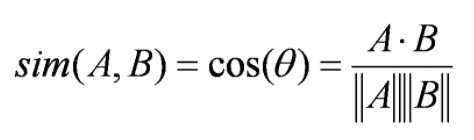

In [27]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [47]:
def cosine_similarity(queryFile):
    files = len(file_dataset)

    #pre-processing the query
    query = print_query(queryFile)
    tokens = preprocessing(queryFile)
    
    print("Query:", query)
    
    d_cosines = []
    
    query_vector = gen_vector(tokens)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))
        
    #the sorted list of files by cosine similarty
    coSim = np.array(d_cosines).argsort()[-files:][::-1]
        
    return list(coSim)

In [45]:
query = "queries-raw-texts/wes2015.q01.naf"
Q = cosine_similarity(query)
print("\nRanked List of Documents:")
print(Q)
print("\nBest Match:")
print_doc(Q[0])

Query: Fabrication of music instruments

Ranked List of Documents:
[15, 253, 84, 185, 208, 258, 152, 184, 214, 314, 169, 7, 59, 98, 3, 162, 5, 242, 161, 153, 99, 93, 178, 295, 88, 144, 38, 58, 311, 328, 310, 298, 81, 27, 171, 64, 272, 129, 280, 254, 316, 73, 228, 211, 76, 151, 283, 274, 264, 31, 194, 20, 163, 51, 315, 23, 135, 37, 233, 115, 122, 183, 104, 100, 95, 106, 103, 107, 97, 108, 102, 101, 94, 92, 110, 109, 96, 105, 121, 111, 130, 145, 143, 142, 141, 140, 139, 138, 137, 136, 134, 133, 132, 131, 128, 112, 127, 126, 125, 124, 123, 90, 120, 119, 118, 117, 116, 114, 113, 91, 330, 89, 87, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 24, 22, 21, 10, 1, 2, 4, 6, 8, 9, 11, 19, 12, 13, 14, 16, 17, 18, 44, 45, 46, 77, 70, 71, 72, 147, 74, 75, 78, 68, 79, 80, 82, 83, 85, 86, 69, 67, 47, 55, 48, 49, 50, 52, 53, 54, 56, 66, 57, 60, 61, 62, 63, 65, 146, 165, 148, 285, 265, 266, 267, 268, 269, 270, 271, 273, 275, 276, 277, 278, 279, 281, 282, 263, 262, 261, 249, 243, 244, 245, 